Naive Bayes Accuracy: 0.9722
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
[[965   0]
 [ 31 119]]
--------------------------------------------------
Logistic Regression Accuracy: 0.9578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.71      0.82       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115

Confusion Matrix:
[[962   3]
 [ 44 106]]
--------------------------------------------------
Support Vector Machine Accuracy: 0.9767
              precision    recall  f1-score   support

 

C:\Users\ludhi\AppData\Local\Temp\ipykernel_14784\2293661957.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='coolwarm')


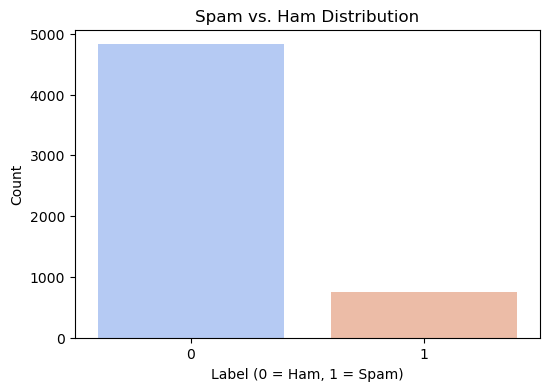

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

# Keep only relevant columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Plot spam vs. ham distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='coolwarm')
plt.title("Spam vs. Ham Distribution")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()
